<a href="https://colab.research.google.com/github/Ansh5667/DogvsCatClassifier/blob/main/DogvsCatClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the Kaggle Library

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Configuring the path of kaggle.json file

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [5]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:04<00:00, 174MB/s]
100% 812M/812M [00:04<00:00, 177MB/s]


In [6]:
#view all the files in the directory
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [7]:
#extracting the compressed dataset
from zipfile import ZipFile

ds = "/content/dogs-vs-cats.zip"

with ZipFile(ds, 'r') as zp:
    zp.extractall()
    print("Dataset extraction succesfull.")

Dataset extraction succesfull.


In [8]:
#extracting the compressed dataset
from zipfile import ZipFile

ds = "/content/train.zip"

with ZipFile(ds, 'r') as zp:
    zp.extractall()
    print("Dataset extraction succesfull.")

Dataset extraction succesfull.


In [9]:
import os
#counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
f_count = len(files)
print("The number of images is: ", f_count)

The number of images is:  25000


Printing the name of images

In [10]:
f_names = os.listdir('/content/train')
print(f_names)

['cat.5581.jpg', 'cat.8006.jpg', 'dog.2946.jpg', 'dog.1689.jpg', 'dog.9509.jpg', 'dog.10618.jpg', 'dog.6173.jpg', 'cat.9403.jpg', 'cat.6237.jpg', 'dog.935.jpg', 'dog.1454.jpg', 'cat.6852.jpg', 'dog.12295.jpg', 'cat.7229.jpg', 'dog.8798.jpg', 'cat.9885.jpg', 'dog.6270.jpg', 'dog.6566.jpg', 'cat.7736.jpg', 'cat.4375.jpg', 'cat.711.jpg', 'dog.698.jpg', 'dog.2054.jpg', 'cat.7704.jpg', 'cat.12284.jpg', 'cat.8136.jpg', 'dog.5906.jpg', 'cat.7211.jpg', 'dog.7875.jpg', 'dog.10780.jpg', 'dog.4861.jpg', 'cat.8894.jpg', 'dog.7614.jpg', 'cat.2119.jpg', 'cat.8766.jpg', 'dog.2041.jpg', 'dog.11618.jpg', 'cat.1287.jpg', 'cat.12116.jpg', 'cat.1476.jpg', 'dog.608.jpg', 'dog.4654.jpg', 'cat.5535.jpg', 'dog.4951.jpg', 'cat.11789.jpg', 'cat.1039.jpg', 'cat.770.jpg', 'dog.7424.jpg', 'cat.4187.jpg', 'dog.219.jpg', 'dog.7011.jpg', 'dog.10775.jpg', 'dog.8747.jpg', 'cat.948.jpg', 'dog.10914.jpg', 'cat.7153.jpg', 'cat.10390.jpg', 'dog.9232.jpg', 'cat.858.jpg', 'dog.690.jpg', 'cat.4478.jpg', 'dog.10427.jpg', 'cat.

Importing the Dependencies

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

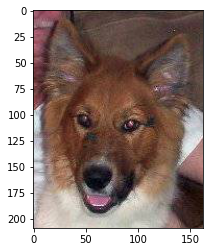

In [16]:
#display dog image
img = mpimg.imread('/content/train/dog.9356.jpg')
imgplt = plt.imshow(img)
plt.show()

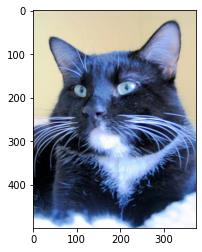

In [19]:
#display cat image
img = mpimg.imread('/content/train/cat.7361.jpg')
imgplt = plt.imshow(img)
plt.show()

Counting the total number of Dog images and total number of Cat images

In [23]:
dog_count = 0;
cat_count = 0;

for img_file in f_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1;
  else:
    cat_count += 1;

print("The number of dog images is: ", dog_count)
print("The number of cat images is: ", cat_count)



The number of dog images is:  12500
The number of cat images is:  12500


Resizing all the images

In [24]:
#creating a directory for resized images
os.mkdir('/content/image_resized')

In [27]:
og_folder = '/content/train/'
resized_folder ='/content/image_resized/'

for i in range(2000):

  filename = os.listdir(og_folder)[i]
  img_path = og_folder + filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

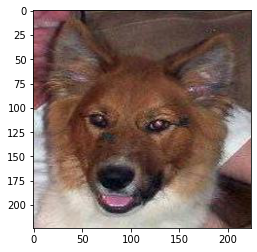

In [28]:
#display resized dog image
img = mpimg.imread('/content/image_resized/dog.9356.jpg')
imgplt = plt.imshow(img)
plt.show()

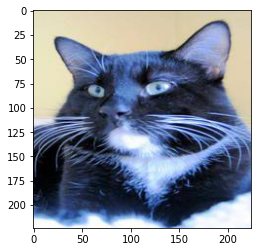

In [29]:
#display resized cat image
img = mpimg.imread('/content/image_resized/cat.7361.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat -> 1


Dog -> 0

In [31]:
#creating a for loop to assign labels
filenames = os.listdir('/content/image_resized/')

labels = []

for i in range(2000):
  filename = filenames[i]
  label = filename[0:3]

  if label == 'dog':
    labels.append(0)
  
  else:
    labels.append(1)

In [34]:
print(filenames[0:5])
print(len(filenames))

['cat.5581.jpg', 'cat.8006.jpg', 'dog.2946.jpg', 'dog.1689.jpg', 'dog.9509.jpg']
2000


In [35]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 0, 0]
2000


In [36]:
# counting the imags of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[1001  999]


Converting all the resized images to numpy arrays

In [37]:
import cv2
import glob

In [56]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.'+ e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])


In [57]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [48]:
type(dog_cat_images)

numpy.ndarray

In [58]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [60]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images


400 --> test images



In [61]:
#scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [63]:
print("X train: ",X_train_scaled)
print("X test: ",X_test_scaled)

X train:  [[[[0.34509804 0.57647059 0.46666667]
   [0.34901961 0.58039216 0.47058824]
   [0.35294118 0.58039216 0.47058824]
   ...
   [0.24313725 0.29019608 0.29019608]
   [0.27058824 0.31764706 0.31764706]
   [0.29019608 0.3372549  0.3372549 ]]

  [[0.34901961 0.57647059 0.46666667]
   [0.34117647 0.56862745 0.45882353]
   [0.3254902  0.55294118 0.44313725]
   ...
   [0.26666667 0.32156863 0.31372549]
   [0.27843137 0.33333333 0.3254902 ]
   [0.26666667 0.33333333 0.32156863]]

  [[0.36078431 0.57647059 0.47058824]
   [0.34509804 0.56078431 0.45490196]
   [0.32156863 0.5372549  0.43137255]
   ...
   [0.26666667 0.35294118 0.33333333]
   [0.25490196 0.34117647 0.32156863]
   [0.22745098 0.31764706 0.29803922]]

  ...

  [[0.9372549  0.94509804 0.94901961]
   [0.88235294 0.89803922 0.90196078]
   [0.63529412 0.65882353 0.65490196]
   ...
   [0.69411765 0.70196078 0.70588235]
   [0.71372549 0.70980392 0.71764706]
   [0.71372549 0.72156863 0.7254902 ]]

  [[1.         0.99607843 1.       

# **Building the Neural Network**

In [64]:
import tensorflow as tf
import tensorflow_hub as hub

In [66]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable = False)

In [67]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [70]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

In [71]:
model.fit(X_train_scaled, Y_train, epochs = 5)

Epoch 1/5
50/50 [==============================] - 52s 949ms/step - loss: 0.1820 - acc: 0.9269
Epoch 2/5
50/50 [==============================] - 45s 905ms/step - loss: 0.0668 - acc: 0.9775
Epoch 3/5
50/50 [==============================] - 47s 946ms/step - loss: 0.0499 - acc: 0.9850
Epoch 4/5
50/50 [==============================] - 47s 945ms/step - loss: 0.0375 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 46s 920ms/step - loss: 0.0324 - acc: 0.9912


In [72]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 12s 808ms/step - loss: 0.0389 - acc: 0.9875
Test Loss = 0.038924962282180786
Test Accuracy = 0.987500011920929


**Predictive System**

Path of the image to be predicted: /content/cat.jpg


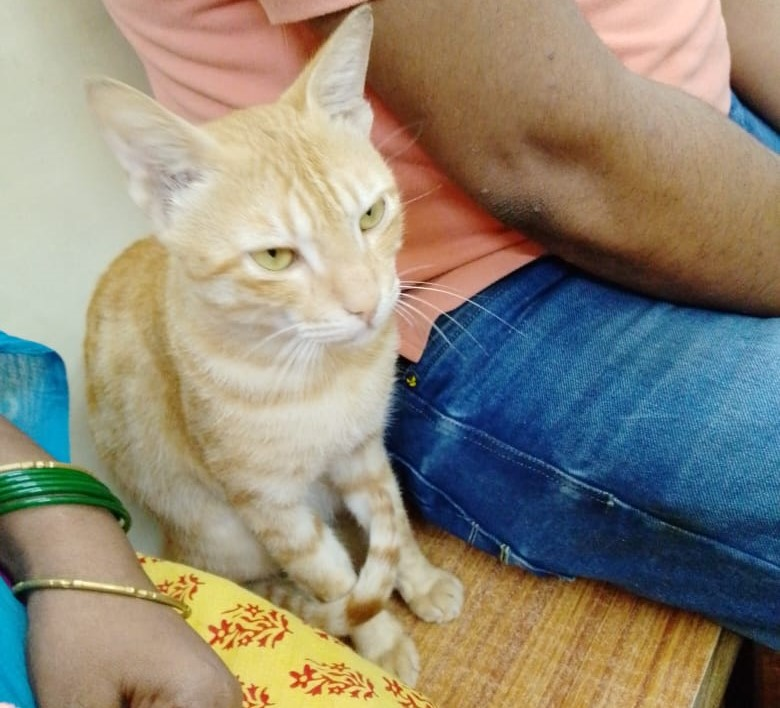

1/1 [==============================] - 0s 97ms/step
[[-3.3002138  4.252334 ]]
1
The image represents a Cat


In [76]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)
 
if input_pred_label == 0:
  print('The image represents a Dog')

else:
  print('The image represents a Cat')